# Sporulation

In [4]:
from __future__ import print_function, division, absolute_import

import sys

import qminospy
from qminospy.me2 import ME_NLP

# python imports
from copy import copy
import re
from os.path import join, dirname, abspath
import sys


sys.path.append('/home/UCSD/cobra_utils')
from collections import defaultdict
import pickle

# third party imports
import pandas
import cobra
from tqdm import tqdm
import numpy as np
import scipy

# COBRAme
import cobrame
from cobrame.util import building, mu, me_model_interface
from cobrame.io.json import save_json_me_model, save_reduced_json_me_model

# ECOLIme
import bacillusme
from bacillusme import (transcription, translation, flat_files, generics, formulas, compartments)
from cobrame.util.helper_functions import *

import copy
from scipy import stats
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
print(cobra.__file__)
print(cobrame.__file__)
print(bacillusme.__file__)
ecoli_files = dirname(abspath(bacillusme.__file__))
pd.set_option('display.max_colwidth', None)

/home/jt/work/cobrapy-0.5.11/cobra/io/sbml3.py:24: UserWarning: Install lxml for faster SBML I/O
  warn("Install lxml for faster SBML I/O")
/home/jt/work/cobrapy-0.5.11/cobra/io/__init__.py:12: UserWarning: cobra.io.sbml requires libsbml
  warn("cobra.io.sbml requires libsbml")


/home/jt/work/cobrapy-0.5.11/cobra/__init__.py
/home/jt/work/cobrame/cobrame/__init__.py
/home/jt/work/sporeme/bacillusme/__init__.py


In [5]:
eco_directory = join(flat_files.ecoli_files_dir, 'iJO1366.json')
ijo_directory = join(flat_files.ecoli_files_dir, 'iYO844.json')
uni_directory = join(flat_files.ecoli_files_dir, 'universal_model.json')

eco = cobra.io.load_json_model(eco_directory)
bsub = cobra.io.load_json_model(ijo_directory)
uni = cobra.io.load_json_model(uni_directory)

bsub.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-16


<Solution 0.12 at 0x7fe3cc272d50>

In [6]:
# with open('../../me_models/solution.pickle', 'rb') as solution:
#     me = pickle.load(solution)

In [7]:
def add_transport(model,mets):
    for i in mets:
        rxn = cobrame.MEReaction('{}_transport'.format(i))
        model.add_reactions([rxn])
        rxn.add_metabolites({
            '{}_c'.format(i):-1,
            '{}_s'.format(i):1
        })
        rxn.bounds = (-1000,1000)

### Essentiality of FS genes

In [2]:
import pickle
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [6]:
add_transport(sporeme,['gtp','ctp','utp'])

In [7]:
from bacillusme.analysis import sensitivity as ss

In [67]:
genes = ['BSU' + g.id.split('RNA_BSU')[1] for g in sporeme.metabolites.query(re.compile('RNA_BSU.*_s$'))]

In [ ]:
for i in range(0,int(len(genes)/100)+1):
    a,b = (i*100,i*100 + 100)
    b = min(b,len(genes))
    print(i+1,a,b)
    flux_responses = ss.all_flux_responses(sporeme,genes[a:b],NP=10,precision=1e-6, solution=sporeme.solution,
                       single_change_function='gene_knockout',growth_key='sigma')
    flux_responses.to_csv('essentiality_raw_results_FS_spoAQ_{}.csv'.format(i+1))

1 0 100


biomass_dilution_s response (10 threads):   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
import os

In [65]:
flux_responses = {}
f = 'essentiality_raw_results_FS_spoAQ'
for i in os.listdir():
    if f not in i: continue
    if f+'.csv' == i: continue
    print(i)
    d = pd.read_csv(i,index_col=0).to_dict()
    for k,v in d.items():
        flux_responses[k] = v
flux_responses = pd.DataFrame.from_dict(flux_responses)
# flux_responses.to_csv('{}.csv'.format(f))

essentiality_raw_results_FS_spoAQ_6.csv
essentiality_raw_results_FS_spoAQ_5.csv
essentiality_raw_results_FS_spoAQ_1.csv
essentiality_raw_results_FS_spoAQ_3.csv
essentiality_raw_results_FS_spoAQ_4.csv
essentiality_raw_results_FS_spoAQ_7.csv
essentiality_raw_results_FS_spoAQ_9.csv
essentiality_raw_results_FS_spoAQ_2.csv
essentiality_raw_results_FS_spoAQ_8.csv


### Essentiality of MC genes

In [ ]:
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [ ]:
from bacillusme.analysis import sensitivity as ss

In [62]:
genes = ['BSU' + g.id.split('RNA_BSU')[1] for \
         g in sporeme.metabolites.query(re.compile('RNA_BSU.*[^s]$'))]

In [ ]:
for i in range(0,int(len(genes)/100)+1):
    a,b = (i*100,i*100 + 100)
    b = min(b,len(genes))
    print(i+1,a,b)
    flux_responses = ss.all_flux_responses(sporeme,genes[a:b],NP=10,precision=1e-6, solution=sporeme.solution,
                       single_change_function='gene_knockout',growth_key='sigma')
    flux_responses.to_csv('essentiality_raw_results_MC_spoAQ_{}.csv'.format(i+1))

In [55]:
flux_responses = {}
f = 'essentiality_raw_results_MC_spoAQ'
for i in os.listdir():
    if f not in i: continue
    if f+'.csv' == i: continue
    print(i)
    d = pd.read_csv(i,index_col=0).to_dict()
    print(len(d))
    for k,v in d.items():
        flux_responses[k] = v
flux_responses = pd.DataFrame.from_dict(flux_responses)
# flux_responses.to_csv('{}.csv'.format(f))

essentiality_raw_results_MC_spoAQ_3.csv
68
essentiality_raw_results_MC_spoAQ_6.csv
100
essentiality_raw_results_MC_spoAQ_8.csv
99
essentiality_raw_results_MC_spoAQ_2.csv
81
essentiality_raw_results_MC_spoAQ_1.csv
72
essentiality_raw_results_MC_spoAQ_11.csv
87
essentiality_raw_results_MC_spoAQ_10.csv
100
essentiality_raw_results_MC_spoAQ_5.csv
101
essentiality_raw_results_MC_spoAQ_4.csv
99
essentiality_raw_results_MC_spoAQ_7.csv
100
essentiality_raw_results_MC_spoAQ_9.csv
77


### Essentiality

In [8]:
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [9]:
FS_df = pd.read_csv('essentiality_raw_results_FS_spoAQ.csv',index_col=0)
MC_df = pd.read_csv('essentiality_raw_results_MC_spoAQ.csv',index_col=0)
VG_df = pd.read_csv('../essentiality/essentiality_raw_me_results.csv',index_col=0)

In [10]:
df = pd.DataFrame.from_dict({'flux':sporeme.solution.x_dict})
sdf = df[df.index.str.contains('translation.*_s')]
sdf[sdf['flux']<=0.]

,flux
translation_BSU00090_s,0.0
translation_BSU00110_s,0.0
translation_BSU00120_s,0.0
translation_BSU00270_s,0.0
translation_BSU00410_s,0.0
...,...
translation_BSU40320_s,0.0
translation_BSU40340_s,0.0
translation_BSU40420_s,0.0
translation_BSU40550_s,0.0


In [11]:
# df = pd.read_csv('../essentiality/essentiality_raw_me_results_eco.csv',index_col=0)

In [12]:
def get_binary_essentiality(df,threshold = 1e-3,obj = 'biomass_dilution'):
    d = {}
    for g,row in df.T.iterrows():
        d[g.split('_s')[0]] = 1 if row[obj] < threshold else 0
    return d
def get_comparison(l,annotation=[],names=[]):
    d = {}
    for i in l[0]:
        if any(i not in di for di in l):
            continue
        v = [di[i] for di in l]
        if not names:
            names = range(len(l))
        d[i] = {ni:vi for ni,vi in zip(names,v)}
        if isinstance(annotation,pd.DataFrame):
            p = '{}-MONOMER'.format(i)
            if p in annotation.index:
                if i in bsub.genes:
                    model_annotation = [r.subsystem for r in bsub.genes.get_by_id(i).reactions]
                d[i]['name'] = locus_to_name[i] if i in locus_to_name else ''
                d[i]['annotation'] = annotation.loc[p]['name']
                d[i]['model_annotation'] = ','.join(model_annotation)
    return pd.DataFrame.from_dict(d).T

In [69]:
FS_es = get_binary_essentiality(FS_df,obj = 'biomass_dilution_s')
VG_es = get_binary_essentiality(VG_df,obj = 'biomass_dilution')
MC_es = get_binary_essentiality(MC_df,obj = 'biomass_dilution_s')
locus_to_name = pd.read_csv('../gene_name_dictionary.csv',index_col=0)['name'].to_dict()

In [14]:
# 
d = {}
for r in sporeme.reactions.query('^translation_BSU.*_s$'):
    g = r.id.split('translation_')[1].split('_s')[0]
    d[g] = {
        'name' : locus_to_name[g],
        'FS_flux' : sporeme.solution.x_dict['translation_{}_s'.format(g)],
        'FS_essential' : bool(FS_es[g]),
        'MC_flux' : sporeme.solution.x_dict['translation_{}'.format(g)],
        'MC_essential' : bool(MC_es[g])
    }
summary_df = pd.DataFrame.from_dict(d).T
summary_df.to_csv('essentiality_summary_spoAQ.csv')
summary_df[(summary_df['FS_flux'] > 1e-16)].to_csv('FS_proteins_summary_spoAQ.csv')
summary_df[(summary_df['MC_flux'] > 1e-16)].to_csv('MC_proteins_summary_spoAQ.csv')
summary_df.head()

,name,FS_flux,FS_essential,MC_flux,MC_essential
BSU00090,guaB,0,False,6.09167e-09,False
BSU00110,pdxS,0,False,0,False
BSU00120,pdxT,0,False,0,False
BSU00130,serS,4.22795e-10,True,1.84078e-09,True
BSU00140,dck,1.41135e-09,False,0,False


In [16]:
complexes = pd.read_csv('bacillus_complexes.csv',index_col=0)

In [17]:
c = get_comparison([FS_es,MC_es,VG_es],annotation=complexes,names=['FS','MC','VG']).fillna('')

In [18]:
c[c['name'].str.contains('sig|spo')]

,FS,MC,VG,name,annotation,model_annotation
BSU34200,1.0,0.0,1.0,sigL,RNA polymerase sigma-54 factor (sigma-L),S_Membrane_bioenergetics
BSU27120,0.0,0.0,0.0,sigV,RNA polymerase ECF(extracytoplasmic function)-type sigma factor (sigma(V)),"S_Carbohydrates_and_related_molecules,S_Carbohydrates_and_related_molecules,S_Carbohydrates_and_related_molecules,S_Carbohydrates_and_related_molecules"
BSU00980,0.0,0.0,0.0,sigH,RNA polymerase sigma-30 factor (sigma(H)),"S_Carbohydrates_and_related_molecules,S_Carbohydrates_and_related_molecules,S_Carbohydrates_and_related_molecules,S_Carbohydrates_and_related_molecules"
BSU25200,1.0,1.0,1.0,sigA,RNA polymerase major sigma-43 factor (sigma-A),"S_Carbohydrates_and_related_molecules,S_Carbohydrates_and_related_molecules"
BSU16470,0.0,0.0,0.0,sigD,RNA polymerase sigma-28 factor (sigma-D),"S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids"
BSU09520,0.0,0.0,0.0,sigM,RNA polymerase ECF (extracytoplasmic function)-type sigma factor (sigma(M)),"S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids,S_Nucleotides_and_nucleic_acids"
BSU01730,0.0,0.0,0.0,sigW,RNA polymerase ECF(extracytoplasmic function)-type sigma factor W,S_Carbohydrates_and_related_molecules
BSU13450,0.0,0.0,0.0,sigI,RNA polymerase sigma factor (heat stress responsive),"S_Amino_acids_and_related_molecules,S_Amino_acids_and_related_molecules"
BSU38700,0.0,0.0,0.0,sigY,RNA polymerase ECF (extracytoplasmic function)-type sigma factor (sigma-Y),S_Nucleotides_and_nucleic_acids
BSU14730,0.0,0.0,0.0,sigP,RNA polymerase ECF-type sigma factor,S_Coenzymes_and_prosthetic_groups


#### What essential genes are regulated by sigF?
spoIIQ

In [41]:
sporeme.metabolites.query("BSU23450")[1].reactions

frozenset({<ComplexFormation formation_CPLX8J2-58 at 0x7fe331851990>,
           <TranslationReaction translation_BSU23450 at 0x7fe3345b3310>})

In [49]:
genes = []
for r in sporeme.metabolites.query("CPLX8J2-58")[0].reactions:
    if not isinstance(r,cobrame.core.reaction.TranscriptionReaction):
        continue
    for m,_ in r.metabolites.items():
        if not isinstance(m, cobrame.core.component.TranscribedGene):
            continue
        genes.append(m.id.split("RNA_")[1])

In [59]:
sporeme.metabolites.query("BSU36550")

[<TranscribedGene RNA_BSU36550 at 0x7fe39dc86110>,
 <TranslatedGene protein_BSU36550 at 0x7fe3329b7bd0>,
 <ProcessedProtein protein_BSU36550_Inner_Membrane at 0x7fe32f5db790>,
 <TranscribedGene RNA_BSU36550_s at 0x7fe32f4dccd0>,
 <TranslatedGene protein_BSU36550_s at 0x7fe32c520dd0>,
 <ProcessedProtein protein_BSU36550_Inner_Membrane_s at 0x7fe32b936490>]

In [55]:
c.loc[[i for i in genes if i in c.index]]

,FS,MC,VG,name,annotation,model_annotation
BSU38630,0.0,0.0,0.0,katX,major catalase in spores,S_Other_function
BSU23450,1.0,0.0,0.0,sigF,RNA polymerase sporulation-specific sigma factor (sigma-F),S_Coenzymes_and_prosthetic_groups


#### What essential genes are regulated by sigE?

In [60]:
sporeme.metabolites.query("BSU15320")[1].reactions

frozenset({<ComplexFormation formation_CPLX8J2-61 at 0x7fe33187f0d0>,
           <TranslationReaction translation_BSU15320 at 0x7fe335525990>})

In [61]:
genes = []
for r in sporeme.metabolites.query("CPLX8J2-61")[0].reactions:
    if not isinstance(r,cobrame.core.reaction.TranscriptionReaction):
        continue
    for m,_ in r.metabolites.items():
        if not isinstance(m, cobrame.core.component.TranscribedGene):
            continue
        genes.append(m.id.split("RNA_")[1])

In [62]:
genes

['BSU38990',
 'BSU38980',
 'BSU24420',
 'BSU24360',
 'BSU24370',
 'BSU24410',
 'BSU24380',
 'BSU24430',
 'BSU24390',
 'BSU24400',
 'BSU15650',
 'BSU14870',
 'BSU18210',
 'BSU18250',
 'BSU18260',
 'BSU18230',
 'BSU18220',
 'BSU30960',
 'BSU30980',
 'BSU30970',
 'BSU30950',
 'BSU30940',
 'BSU26390',
 'BSU25760',
 'BSU10790',
 'BSU05740',
 'BSU25070',
 'BSU24140',
 'BSU24150',
 'BSU24130',
 'BSU24120',
 'BSU24160',
 'BSU24170']

In [63]:
c.loc[[i for i in genes if i in c.index]]

,FS,MC,VG,name,annotation,model_annotation
BSU38990,0.0,0.0,0.0,scoA,acetoacetyl CoA-transferase (subunit A),S_Carbohydrates_and_related_molecules
BSU38980,0.0,0.0,0.0,scoB,succinyl CoA:3-oxoacid CoA-transferase (subunit B),S_Carbohydrates_and_related_molecules
BSU14870,0.0,0.0,0.0,ctaA,heme <i>a</i> synthase,S_Membrane_bioenergetics
BSU18210,0.0,0.0,0.0,ldeE,methylcrotonoyl-CoA carboxylase subunit (leucine degradation),S_Carbohydrates_and_related_molecules
BSU18250,0.0,0.0,0.0,ldeI,acetoacetyl-CoA synthetase,"S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids"
BSU18260,0.0,0.0,0.0,ldeJ,isovaleryl-CoA dehydrogenase (leucine degradation),"S_Lipids,S_Lipids,S_Lipids"
BSU18230,0.0,0.0,0.0,ldeG,hydroxymethylglutaryl-CoA lyase (leucine degradation),S_Lipids
BSU18220,0.0,0.0,0.0,ldeF,methylglutaconyl-CoA hydratase (leucine degradation),"S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids,S_Lipids"
BSU30960,0.0,0.0,0.0,glgD,glucose-1-phosphate adenylyltransferase (ADP-glucose pyrophosphorylase) beta subunit,S_Carbohydrates_and_related_molecules
BSU30980,0.0,0.0,0.0,glgB,"1,4-alpha-glucan branching enzyme",S_Carbohydrates_and_related_molecules


In [56]:
sporeme.metabolites.RNA_BSU23450_s.reactions

frozenset({<MEReaction DM_RNA_BSU23450_s at 0x7fe32c1fe2d0>,
           <TranscriptionReaction transcription_TU8J2_69_from_BSU23450-MONOMER_s at 0x7fe32f537b90>,
           <TranscriptionReaction transcription_TU8J2_709_from_BSU15330-MONOMER_s at 0x7fe32ef232d0>,
           <TranslationReaction translation_BSU23450_s at 0x7fe32cd3b690>})

#### Comparison plot

FS    170.0
MC    190.0
VG    301.0
dtype: float64


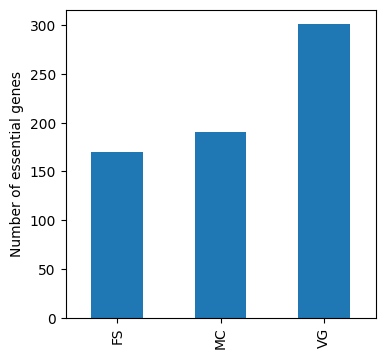

In [19]:
print(c[['FS','MC','VG']].sum())
c[['FS','MC','VG']].sum().plot.bar(figsize=(4,4))
plt.ylabel('Number of essential genes')
plt.savefig('./figures/essential_genes_spoAQ.svg',format='SVG')

In [174]:
from matplotlib_venn import venn3
plt.rcParams['svg.fonttype'] = 'none'

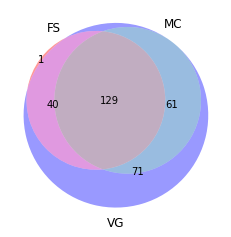

In [175]:
fs = set(c[c['FS']>0].index)
mc = set(c[c['MC']>0].index)
vg = set(c[c['VG']>0].index)
venn3([fs,mc,vg],('FS','MC','VG'))
plt.savefig('figures/venn_FS_MC_VG_spoAQ.svg',format='SVG')

In [176]:
c[(c['FS'] == 1)&(c['VG'] == 0)]

,FS,MC,VG,name,annotation,model_annotation
BSU23450,1,0,0,sigF,RNA polymerase sporulation-specific sigma factor (sigma-F),S_Coenzymes_and_prosthetic_groups


In [177]:
c[(c['FS'] == 1)&(c['VG'] == 1)].loc['BSU04730']

FS                                                          1
MC                                                          0
VG                                                          1
name                                                     sigB
annotation          RNA polymerase sigma-37 factor (sigma(B))
model_annotation                                  S_Cell_wall
Name: BSU04730, dtype: object

In [178]:
c.drop('base').to_csv('Supplementary Files/Supplementary File 2.csv')

In [94]:
c[(c.FS==1) & (c.MC==0)].drop(['FS','MC','VG'],axis=1).to_csv('annotation_FS.csv')

In [95]:
c[(c.FS==0) & (c.MC==1)].drop(['FS','MC','VG'],axis=1).to_csv('annotation_MC.csv')

In [96]:
c[(c.FS==0) & (c.MC==0) & (c.VG == 1)].drop(['FS','MC','VG'],axis=1).to_csv('annotation_VG.csv')

In [97]:
c[(c.FS==1) & (c.MC==1) & (c.VG==1)].drop(['FS','MC','VG'],axis=1).to_csv('annotation_both.csv')

In [ ]:
for r in bsub.genes.get_by_id('BSU24030').reactions:
    print(r.name)
    print(r.reaction)

In [ ]:
flux_based_reactions(sporeme,'protein_BSU24040')

In [ ]:
FS_df['BSU24040_s']

In [ ]:
flux_based_reactions(sporeme,'cdp_s',flux_dict=FS_df['BSU22890_s'].to_dict())

In [ ]:
flux_based_reactions(sporeme,'ctp_s',flux_dict=FS_df['BSU22890_s'].to_dict())

In [147]:
name_to_locus['phoB']

'BSU05740'

In [146]:
locus_to_name['BSU09410']

'phoA'